In [27]:
from haystack.document_stores import InMemoryDocumentStore
from haystack.nodes.retriever.multimodal import MultiModalRetriever
import os
from haystack import Document
from haystack import Pipeline

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [29]:
class MultimodalSearch:
    def __init__(self):

        self.document_store = InMemoryDocumentStore(embedding_dim=512)

        doc_dir = "Road-traffic"

        images = [
            Document(content=f"./{doc_dir}/{filename}", content_type="image")
            for filename in os.listdir(f"./{doc_dir}")
        ]

        self.document_store.write_documents(images)

        self.retriever_text_to_image = MultiModalRetriever(
            document_store=self.document_store,
            query_embedding_model="sentence-transformers/clip-ViT-B-32",
            query_type="text",
            document_embedding_models={"image": "sentence-transformers/clip-ViT-B-32"},
        )


        self.document_store.update_embeddings(retriever=self.retriever_text_to_image)

        self.pipeline = Pipeline()
        self.pipeline.add_node(component=self.retriever_text_to_image, name="retriever_text_to_image", inputs=["Query"])

    def search(self, query, top_k=3):
        results = self.pipeline.run(query=query, params={"retriever_text_to_image": {"top_k": top_k}})
        return sorted(results["documents"], key=lambda d: d.score, reverse=True)

In [30]:
multimodal_search = MultimodalSearch()
results = multimodal_search.search(query="blue truck")

Documents Processed: 10000 docs [00:06, 1476.21 docs/s]        


In [31]:
def plot_image(image_path):

    img = mpimg.imread(image_path)


    plt.imshow(img)
    plt.axis('off') 
    plt.show()

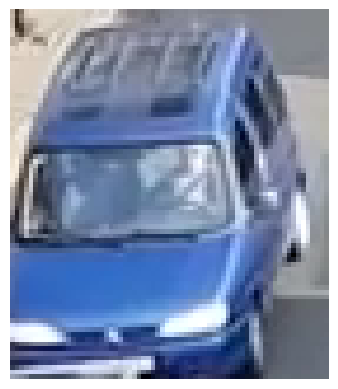

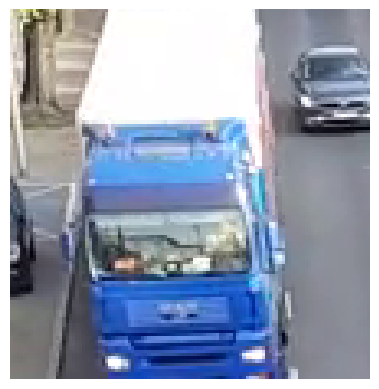

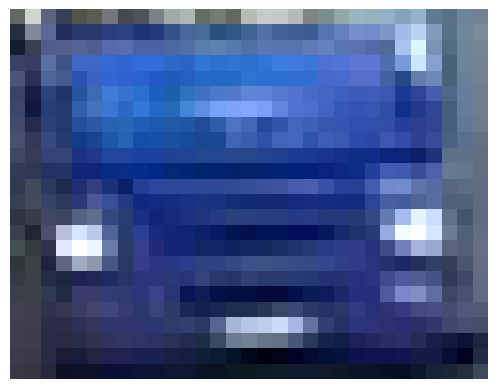

In [32]:
for i in range(3):
    plot_image(results[i].content)

In [33]:
multimodal_search = MultimodalSearch()
results = multimodal_search.search(query="red")

Documents Processed: 10000 docs [00:06, 1483.92 docs/s]        


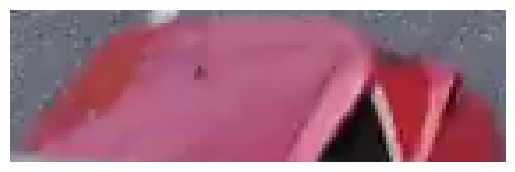

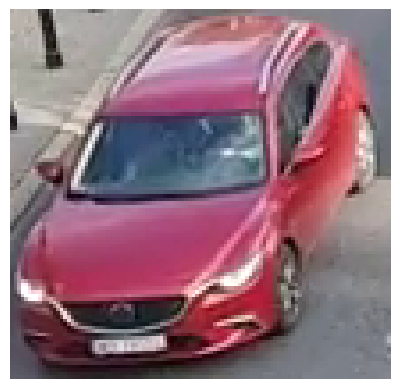

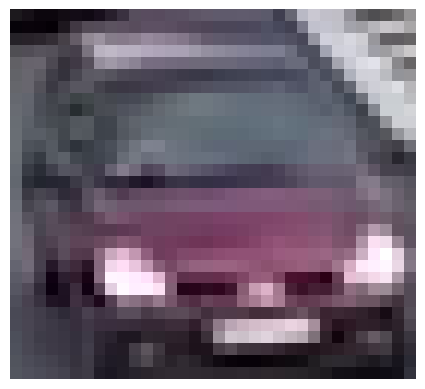

In [34]:
for i in range(3):
    plot_image(results[i].content)